<a href="https://colab.research.google.com/github/AlexanderDev2004/PCVK/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


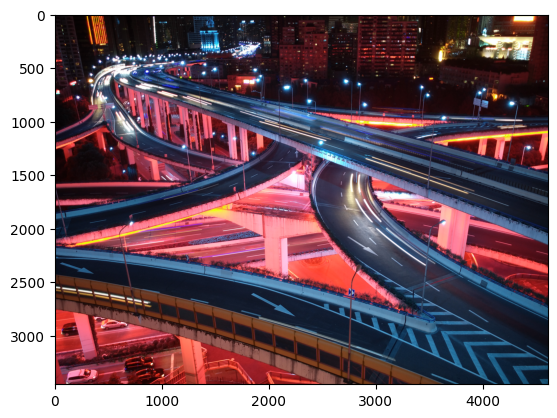

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/01.jpg')
plt.imshow(img)

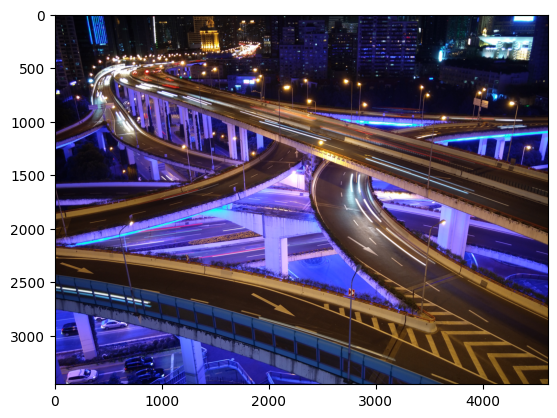

In [3]:
img2 = img
im3 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(im3)

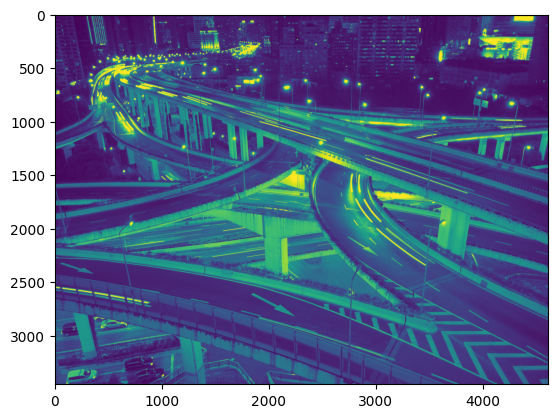

In [4]:
img_gray = cv.imread('/content/drive/MyDrive/01.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

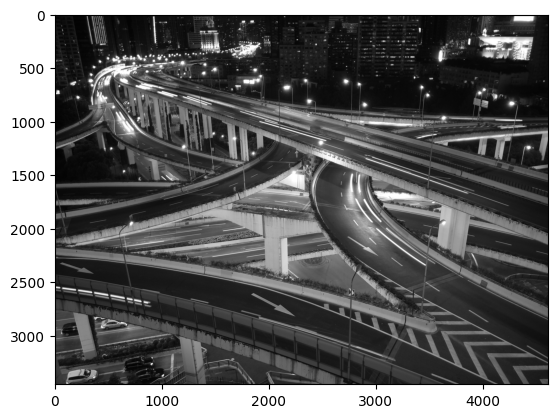

In [5]:
plt.imshow(img_gray, cmap='gray')

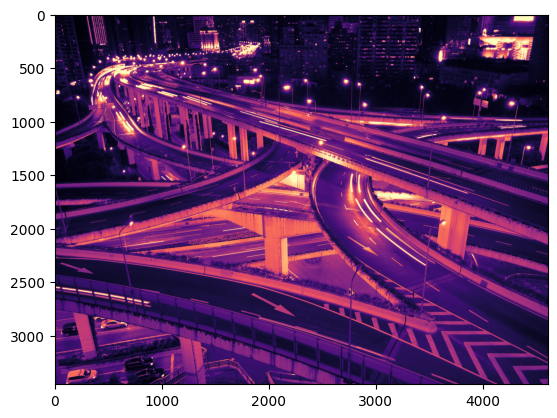

In [6]:
plt.imshow(img_gray, cmap='magma')

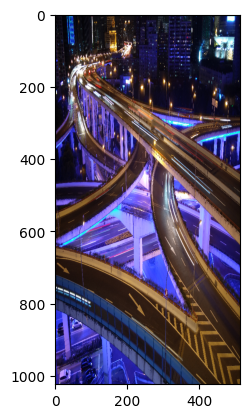

In [7]:
img4 = cv.resize(cv.cvtColor(img, cv.COLOR_BGR2RGB), (512,1024))
plt.imshow(img4)

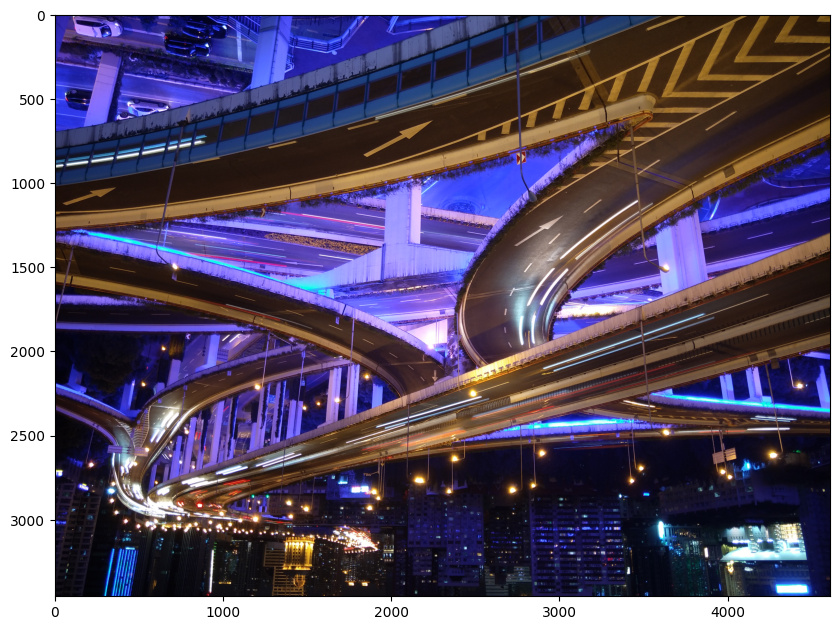

In [8]:
img5 = cv.flip(cv.cvtColor(img, cv.COLOR_BGR2RGB), 0)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(img5)

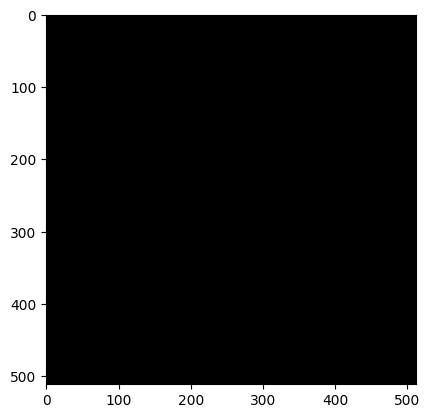

In [9]:
black_img = np.zeros((512,512,3), dtype=np.uint8)
plt.imshow(black_img)

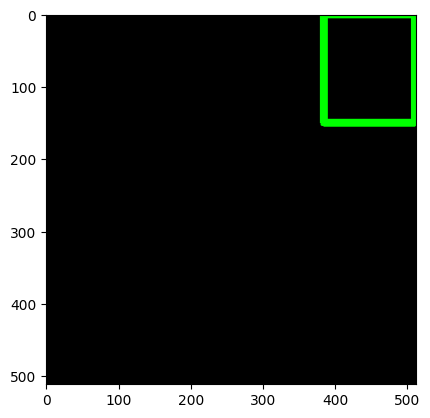

In [10]:
cv.rectangle(black_img,pt1=(384,0), pt2=(510,150), color=(0,255,0), thickness=10)
plt.imshow(black_img)

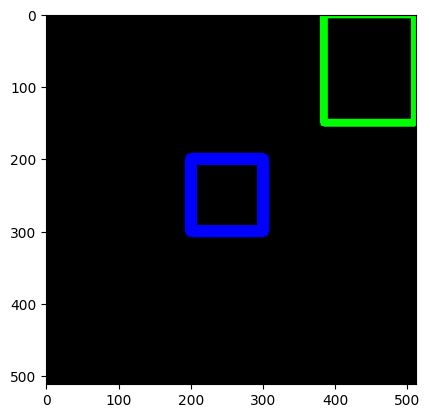

In [11]:
cv.rectangle(black_img,pt1=(200,200), pt2=(300,300), color=(0,0,255), thickness=15)
plt.imshow(black_img)

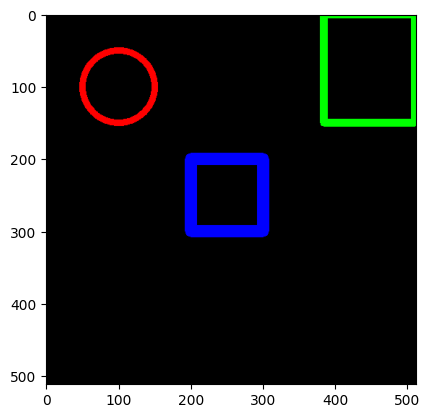

In [12]:
cv.circle(black_img, center=(100,100), radius=50, color=(255,0,0), thickness=8)
plt.imshow(black_img)

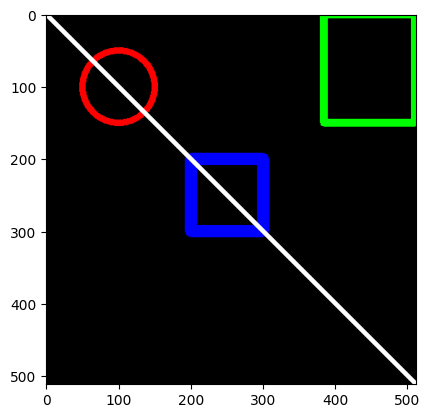

In [13]:
cv.line(black_img, pt1=(0,0), pt2=(512,512), color=(255,255,255), thickness=5)
plt.imshow(black_img)


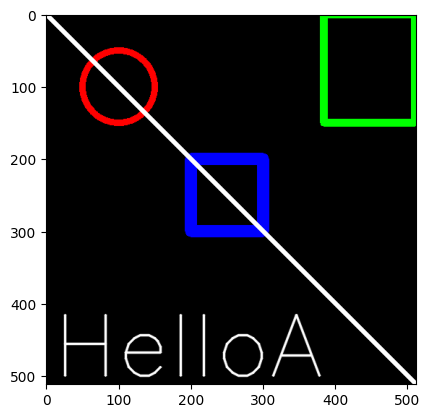

In [14]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_img, text='HelloA', org=(10,500), fontFace=font, fontScale=4, color=(255,255,255), thickness=2, lineType=cv.LINE_AA)
plt.imshow(black_img)

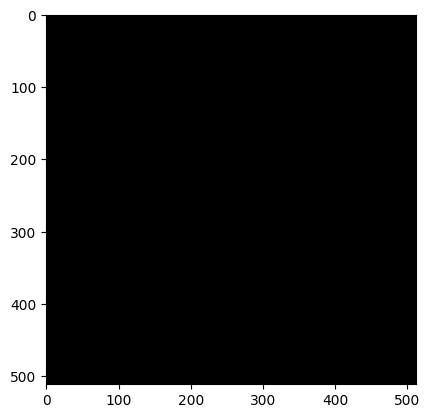

In [15]:
black_img2=np.zeros(shape=(512,512,3), dtype=np.int32)
plt.imshow(black_img2)

In [16]:
vertices = np.array([[100,300],[200,200],[400,300],[200,400]], dtype=np.int32)
vertices

array([[100, 300],
       [200, 200],
       [400, 300],
       [200, 400]], dtype=int32)

In [17]:
reshaped_vertices = vertices.reshape((-1,1,2))
reshaped_vertices

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

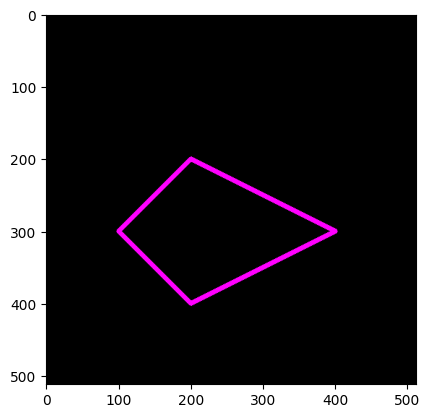

In [18]:
cv.polylines(black_img2, [reshaped_vertices], isClosed=True, color=(255, 0, 255), thickness=5)
plt.imshow(black_img2)

PERTANYAAN PRAKTIKUM D3

1. Apakah perbedaan gambar yang ditampilkan tanpa dan dengan matplotlib? </br>
jawab:

- Gambar ditampilkan langsung dengan warna BGR (Blue–Green–Red).
- Kalau gambar RGB ditampilkan langsung, warnanya bisa terbalik (merah jadi biru, dll).
- Biasanya lebih cepat dan sesuai untuk debugging di OpenCV.

2. Apakah perbedaan dan pengaruhnya pembuatan black image antara tipe data
int16 dan int32? </br>
jawab :
- int16: range nilai piksel = -32768 s/d 32767.
Tidak cocok untuk representasi citra standar (0–255).
Bisa dipakai kalau ada operasi perhitungan/filter yang bisa menghasilkan nilai negatif.

- int32: range nilai lebih luas -2,147,483,648 s/d 2,147,483,647.
Lebih boros memori.
Cocok kalau mau simpan hasil komputasi dengan angka besar (misalnya akumulasi banyak piksel).

3. Apakah kegunaan “google.colab.patches import cv2_imshow” pada potongan
kode berikut </br>
```python
from google.colab.patches import cv2_imshow
import skimage.io as io
```
jawab :

- cv2.imshow bawaan OpenCV tidak bisa digunakan langsung di Google Colab, karena butuh jendela GUI (window).
- cv2_imshow adalah fungsi khusus Colab untuk menampilkan gambar langsung di output cell (seperti plt.imshow).
Jadi fungsinya = menggantikan cv2.imshow agar bisa jalan di Google Colab.

4. Apakah kegunaan “skimage import io” pada potongan kode soal nomor 3 </br>
jawab :
library serbaguna untuk load/save gambar dengan dukungan format lebih banyak daripada OpenCV.

TUGAS PRAKTIKUM D3

1. Dengan menggunakan figsize, perhatikan apakah ukuran image pixelnya
juga berubah?

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

# Load image
img = cv2.imread("lena.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV baca BGR → ubah ke RGB


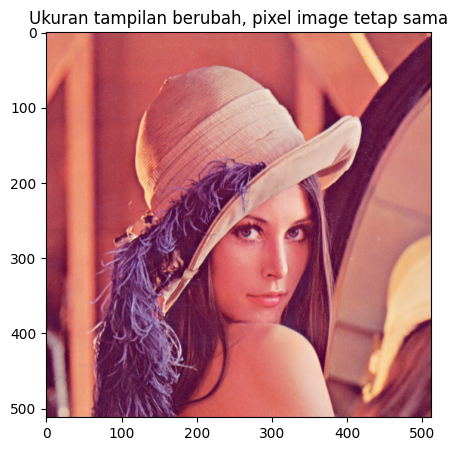

In [21]:
plt.figure(figsize=(10,5))
plt.imshow(img_rgb)
plt.title("Ukuran tampilan berubah, pixel image tetap sama")
plt.show()


Jawaban: Tidak. `figsize` hanya mengubah ukuran tampilan (plot), bukan resolusi pixel asli dari image.

2. Tampilkan image dalam channel Red-Blue dan Green-Blue saja

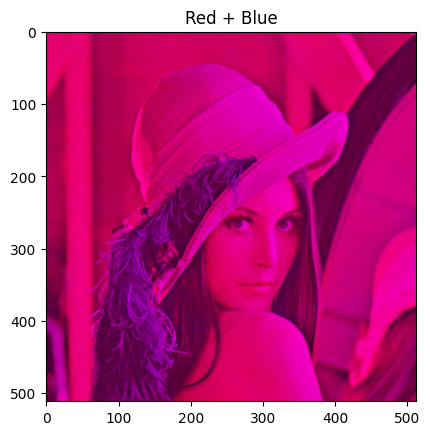

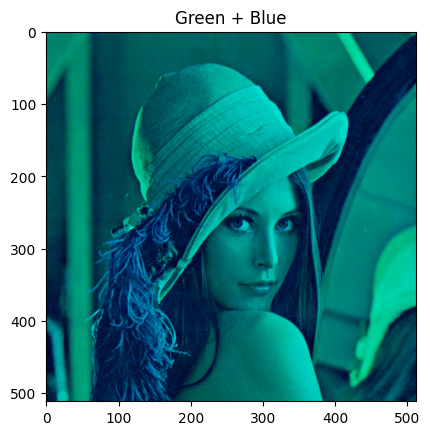

In [22]:
# Red + Blue
rb = img_rgb.copy()
rb[:,:,1] = 0   # hilangkan channel Green
plt.imshow(rb)
plt.title("Red + Blue")
plt.show()

# Green + Blue
gb = img_rgb.copy()
gb[:,:,0] = 0   # hilangkan channel Red
plt.imshow(gb)
plt.title("Green + Blue")
plt.show()


3. Tampilkan image baris ke 20–115, kolom 25–120

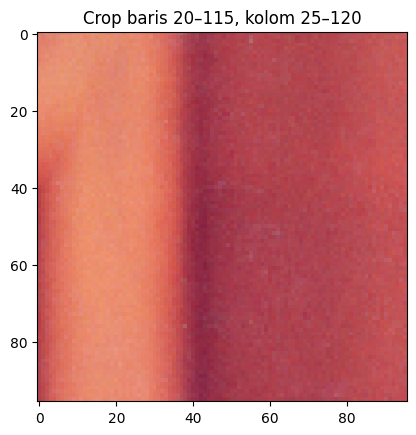

In [23]:
crop1 = img_rgb[20:116, 25:121]
plt.imshow(crop1)
plt.title("Crop baris 20–115, kolom 25–120")
plt.show()


4. Tampilkan image baris ke 5–30, semua kolom, channel Red saja

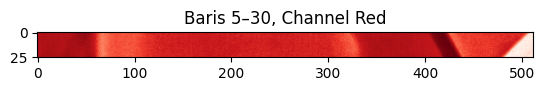

In [24]:
red_only = img_rgb[5:31, :, 0]   # channel R saja
plt.imshow(red_only, cmap="Reds")
plt.title("Baris 5–30, Channel Red")
plt.show()


5. Buat 5 kotak berbagai ukuran dan warna acak

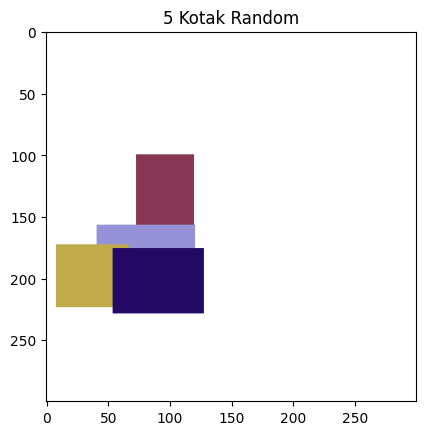

In [25]:
canvas = np.ones((300, 300, 3), dtype=np.uint8) * 255  # background putih

for i in range(5):
    x1, y1 = random.randint(0, 200), random.randint(0, 200)
    x2, y2 = x1 + random.randint(20, 100), y1 + random.randint(20, 100)
    color = (random.randint(0,255), random.randint(0,255), random.randint(0,255))
    cv2.rectangle(canvas, (x1,y1), (x2,y2), color, -1)

plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
plt.title("5 Kotak Random")
plt.show()


6. Tampilkan image dengan posisi terbalik

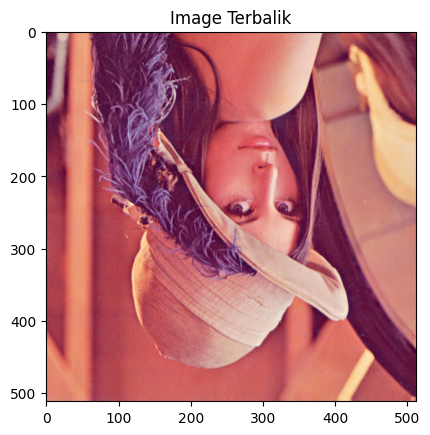

In [26]:
flipped = cv2.flip(img_rgb, 0)   # 0 → flip vertical
plt.imshow(flipped)
plt.title("Image Terbalik")
plt.show()


7. Buat rectangle dan circle pada bagian wajah (foto aktivitas pribadi)

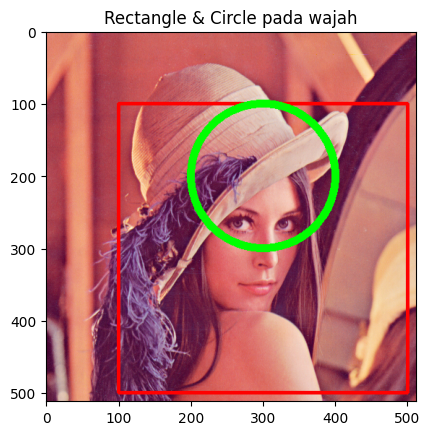

In [43]:
face_img = cv2.imread("lena.png")
face_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

# Contoh: rectangle di wajah + circle di sekitar
cv2.rectangle(face_rgb, (100,100), (500,500), (255,0,0), 3)
cv2.circle(face_rgb, (300,200), 100, (0,255,0), 10)

plt.imshow(face_rgb)
plt.title("Rectangle & Circle pada wajah")
plt.show()


8. Buat rectangle pada sudut bawah kiri channel B dari citra

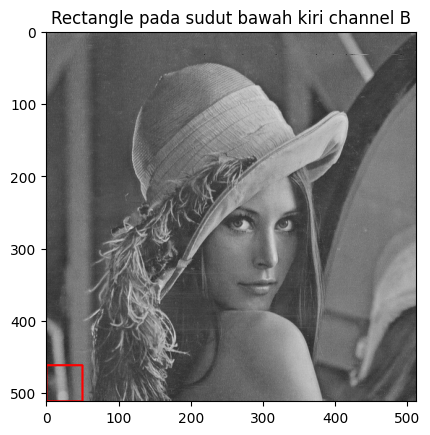

In [44]:
b_channel = img[:,:,0]   # ambil channel B saja
b_rgb = cv2.merge([b_channel, b_channel, b_channel])  # biar bisa ditampilkan

# rectangle di pojok kiri bawah
h, w = b_channel.shape
cv2.rectangle(b_rgb, (0,h-50), (50,h), (255,0,0), 2)

plt.imshow(b_rgb, cmap="gray")
plt.title("Rectangle pada sudut bawah kiri channel B")
plt.show()


9. Lengkapi tulisan nama file pada citra dari soal no.8

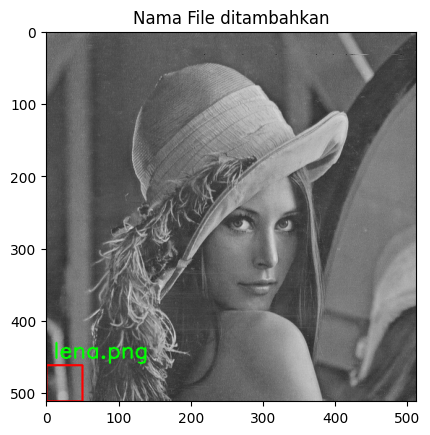

In [45]:
cv2.putText(b_rgb, "lena.png", (10,h-60),
            cv2.FONT_HERSHEY_SIMPLEX,
            1, (0,255,0), 2)

plt.imshow(b_rgb)
plt.title("Nama File ditambahkan")
plt.show()


TUGAS KELOMPOK

Link: https://colab.research.google.com/drive/1Cz7NeK9f-emyADrVp3veHYosCJtuwOpy?usp=sharing